In [29]:
## importing essential libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
## fetching our player file
df = pd.read_excel('players.xlsx',)

## displying first five records
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,95.0,85.0,68.0,72.0,59.0,94.0,48.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,70.0,95.0,95.0,88.0,79.0,93.0,63.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,84.0,80.0,61.0,81.0,49.0,82.0,56.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,43.0,31.0,67.0,43.0,64.0,12.0,38.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,77.0,91.0,63.0,90.0,75.0,91.0,76.0,10.0,13.0,€196.4M


In [3]:
## set "ID" column as index
df.set_index("ID",inplace=True)

In [4]:
## than reset index and sort it
df.reset_index(inplace=True)

In [5]:
## collecting information about our players dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    18207 non-null  int64         
 1   Name                  18207 non-null  object        
 2   Age                   18207 non-null  int64         
 3   Nationality           18207 non-null  object        
 4   Overall               18207 non-null  int64         
 5   Potential             18207 non-null  int64         
 6   Club                  17966 non-null  object        
 7   Value                 18207 non-null  object        
 8   Wage                  18207 non-null  object        
 9   Special               18207 non-null  int64         
 10  Preferred Foot        18159 non-null  object        
 11  Weak Foot             18159 non-null  float64       
 12  Skill Moves           18159 non-null  float64       
 13  Work Rate       

In [6]:
## detecting null values for each column
df.isnull().sum()

ID                         0
Name                       0
Age                        0
Nationality                0
Overall                    0
Potential                  0
Club                     241
Value                      0
Wage                       0
Special                    0
Preferred Foot            48
Weak Foot                 48
Skill Moves               48
Work Rate                 48
Body Type                 48
Real Face                 48
Position                  60
Joined                  1553
Contract Valid Until     289
Height                    48
Weight                    48
FKAccuracy                48
LongPassing               48
BallControl               48
Acceleration              48
SprintSpeed               48
Agility                   48
Reactions                 48
Balance                   48
ShotPower                 48
Jumping                   48
Stamina                   48
Strength                  48
LongShots                 48
Aggression    

In [7]:
## drop null values
df = df.dropna()

In [8]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,95.0,85.0,68.0,72.0,59.0,94.0,48.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,70.0,95.0,95.0,88.0,79.0,93.0,63.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,84.0,80.0,61.0,81.0,49.0,82.0,56.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,43.0,31.0,67.0,43.0,64.0,12.0,38.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,77.0,91.0,63.0,90.0,75.0,91.0,76.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16638,244199,K. Engbers,18,Netherlands,57,68,Hamilton Academical FC,€140K,€1K,1309,...,59.0,48.0,62.0,55.0,67.0,46.0,49.0,14.0,15.0,€143K
16639,225001,K. Wootton,21,England,57,64,SKN St. Pölten,€150K,€1K,1319,...,58.0,60.0,64.0,54.0,75.0,52.0,26.0,7.0,6.0,€113K
16640,237545,U. Türker,20,Turkey,57,72,Henan Jianye FC,€230K,€2K,1551,...,73.0,53.0,60.0,66.0,67.0,46.0,44.0,8.0,12.0,€165K
16641,243177,L. Malicsek,19,Austria,57,71,Sarpsborg 08 FF,€200K,€1K,1498,...,57.0,50.0,54.0,48.0,76.0,33.0,56.0,7.0,14.0,€143K


In [9]:
### displying attributes
print("Total players are: ",df.shape[0])
print("Attributes: ",df.shape[1])

Total players are:  16643
Attributes:  38


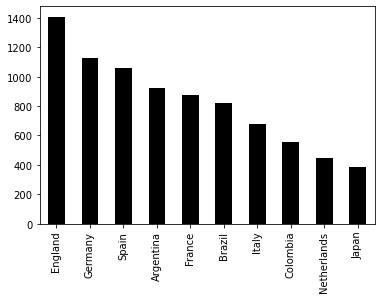

In [10]:
## Top 10 nationalities with the highest players in FIFA
top = df['Nationality'].value_counts().nlargest(10)
top.plot(kind="bar",color="k")

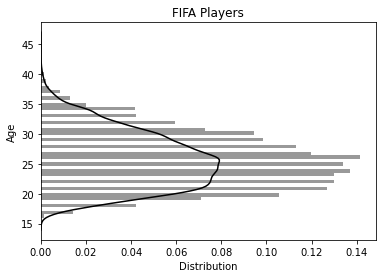

In [11]:
## FIFA Players Age
sns.distplot(df['Age'],vertical=True,color="k")
plt.title("FIFA Players")
plt.xlabel("Distribution")
plt.show()


In [12]:
## Simple descriptive statistics of values
df.describe()

,ID,Age,Overall,Potential,Special,Weak Foot,Skill Moves,FKAccuracy,LongPassing,BallControl,...,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,GKPositioning,GKReflexes
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,...,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000
mean,212031.032566,25.600613,67.435679,71.834044,1628.450099,2.971520,2.409061,43.998618,54.018927,59.833383,...,63.059785,64.243646,56.770835,65.697230,64.462717,66.307096,48.528510,57.170883,16.189509,16.476356
std,30045.796412,4.507377,5.919836,5.955286,256.577432,0.662691,0.758841,17.488202,14.842058,16.020862,...,8.201515,14.015064,16.937729,11.730948,15.388838,12.207667,18.999059,17.075340,17.049234,17.893635
min,16.000000,16.000000,57.000000,57.000000,780.000000,1.000000,1.000000,3.000000,9.000000,5.000000,...,30.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,1.000000,1.000000
25%,198553.500000,22.000000,63.000000,68.000000,1508.000000,3.000000,2.000000,32.000000,45.000000,56.000000,...,58.000000,56.000000,48.000000,59.000000,58.000000,59.000000,35.000000,45.000000,8.000000,8.000000
50%,217167.000000,25.000000,67.000000,71.000000,1662.000000,3.000000,2.000000,43.000000,57.000000,64.000000,...,63.000000,66.000000,61.000000,67.000000,68.000000,67.000000,53.000000,60.000000,11.000000,11.000000
75%,233781.500000,29.000000,71.000000,76.000000,1801.000000,3.000000,3.000000,58.000000,65.000000,70.000000,...,68.000000,74.000000,69.000000,74.000000,75.000000,75.000000,63.000000,70.000000,14.000000,14.000000
max,246617.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,94.000000,93.000000,96.000000,...,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,90.000000,94.000000


In [13]:
## Players body type
l = []
for i in df["Body Type"]:
    if(i=="Normal" or i=="Lean"):
        l.append(i)
    else:
        l.append("Stocky")

df["Body Type"] = pd.Series(l)
df["Body Type"]

0        Stocky
1        Stocky
2        Stocky
3          Lean
4        Normal
          ...  
16638    Normal
16639    Normal
16640    Normal
16641      Lean
16642    Normal
Name: Body Type, Length: 16643, dtype: object

In [14]:
print("There are three main body types for each player: ")
list(df["Body Type"].unique())

There are three main body types for each player: 


['Stocky', 'Lean', 'Normal']

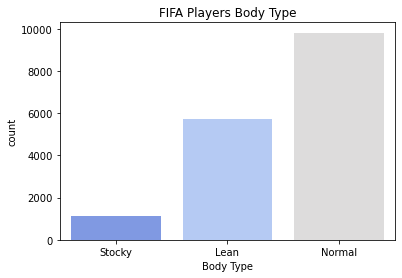

In [15]:
sns.countplot(df["Body Type"],palette=sns.color_palette('coolwarm', n_colors=5))
plt.title("FIFA Players Body Type")
plt.show()

In [16]:
print("Number of clubs: ",df.iloc[:,6].nunique())

Number of clubs:  651


In [17]:
### the p[layers with Ther highest wages
df["Wage"] = pd.to_numeric(df.loc[:,"Wage"].str.replace("€"," ").str.replace("K",""))

In [18]:
print("Top five players with the highest wage")
df.loc[:,["Name","Wage"]].sort_values(by="Wage",ascending=False).head(5)


Top five players with the highest wage


,Name,Wage
0,L. Messi,565.0
7,L. Suárez,455.0
6,L. Modrić,420.0
1,Cristiano Ronaldo,405.0
8,Sergio Ramos,380.0


In [19]:
## Calculating body mass index for each player

def square(x):
    return x**2


df["BMI"] = pd.to_numeric(df['Weight'].str.replace("lbs"," "))/(pd.to_numeric(df["Height"].str.strip().str.replace("'",".")).apply(square))*10

In [20]:
df["BMI"]

0        48.938135
1        47.606660
2        43.091066
3        41.015625
4        58.976490
           ...    
16638    51.388889
16639    46.761623
16640    45.833333
16641    46.761623
16642    64.590542
Name: BMI, Length: 16643, dtype: float64

In [21]:
## individual health
hel = []
for i in df["BMI"]:
    if(i<=18.5):
        hel.append("Underweight")
    elif(i>18.5 and i<=24.9):
        hel.append("Normal Weight")
    elif(i>=25 and i<=29.9):
        hel.append("Overweight")
    else:
        hel.append("obese")


In [22]:
print("most of the players have obese BMI classification and are: ",hel.count("obese"))

most of the players have obese BMI classification and are:  16643


In [23]:
## Players with perferred foot
df["Preferred Foot"].value_counts()

Right    12675
Left      3968
Name: Preferred Foot, dtype: int64

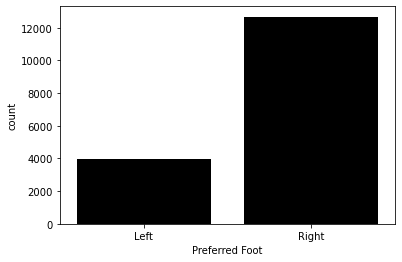

In [24]:
sns.countplot(df["Preferred Foot"],color="Black")
plt.show()

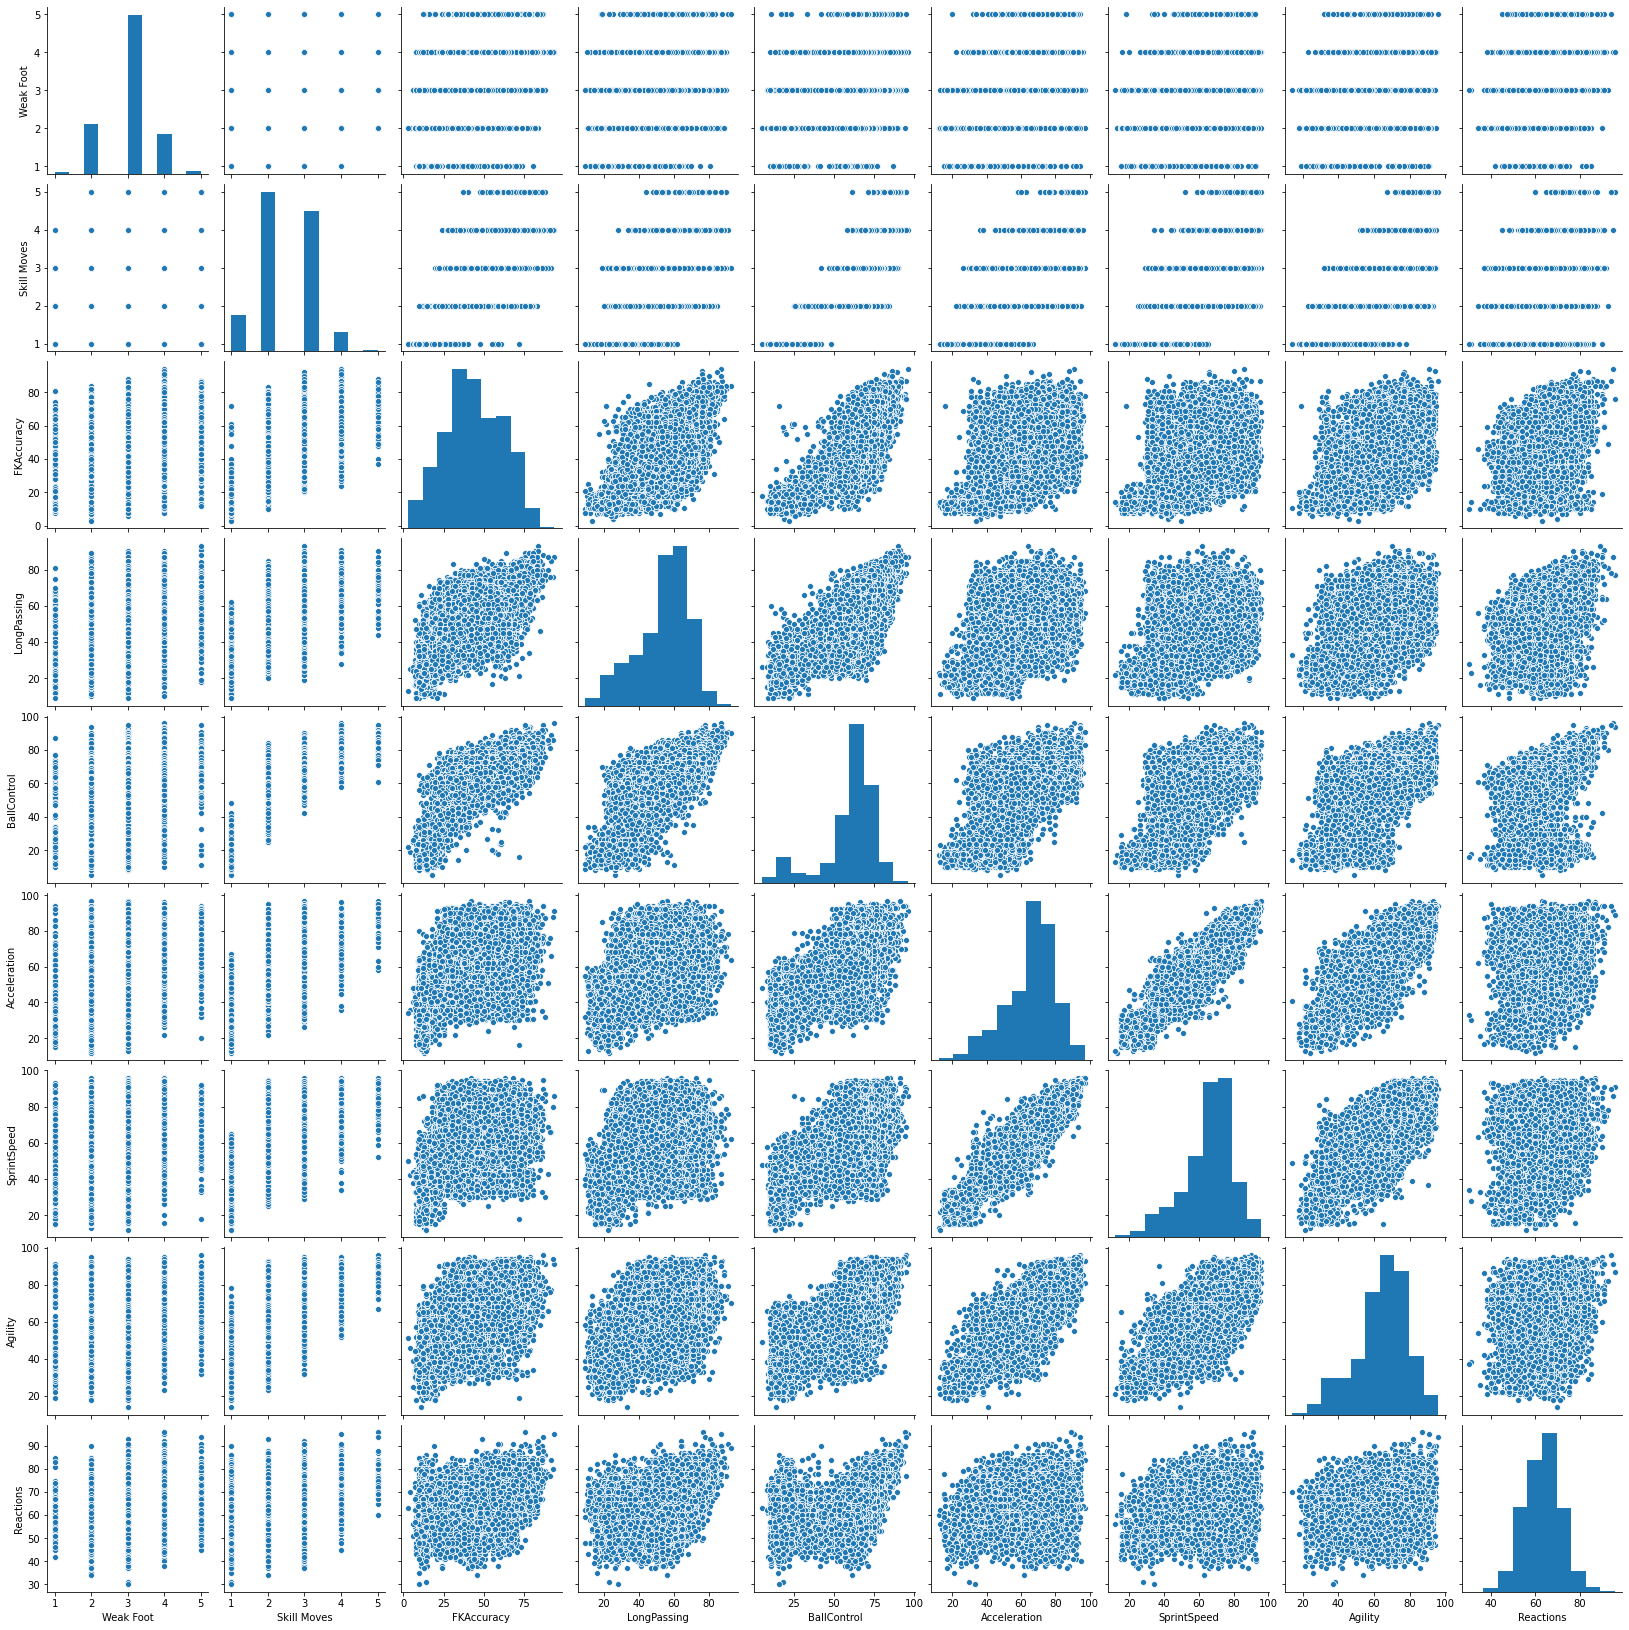

In [25]:
##  finding linear relationship
df1 = df.select_dtypes('float').iloc[:,1:10]
sns.pairplot(df1)

There is a linear relationship between Acceleration and Agility


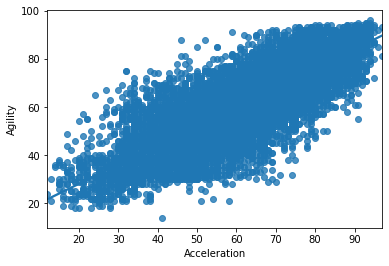

In [26]:
print("There is a linear relationship between Acceleration and Agility")
sns.regplot(df["Acceleration"],df["Agility"])
plt.show()

In [27]:
X = df["Acceleration"].values.reshape(-1,1)
Y = df["Agility"].values.reshape(-1,1)

In [32]:
## train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [35]:
# linear Model
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [50]:
prediction = reg.predict(X_test)
prediction

array([[73.685732  ],
       [66.48091511],
       [66.48091511],
       ...,
       [48.86914048],
       [69.68305595],
       [52.87181653]])

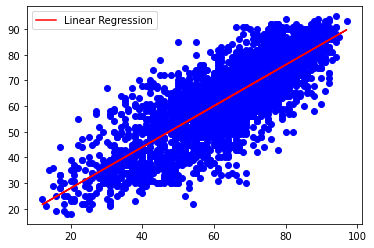

In [44]:
plt.plot(X_test,prediction,label="Linear Regression",color="r")
plt.scatter(X_test,Y_test,color="b")
plt.legend()
plt.show()

In [51]:
reg.predict(np.array([[73]]))

array([[70.48359116]])